In [60]:
import pandas as pd
import matplotlib as mlt
import seaborn as sns
import numpy as np
import pickle

In [61]:
df = pd.read_csv('~/my_proj/data/car.csv')

Car_id: Уникальный идентификатор для каждого автомобиля в наборе данных.

Date: Дата сделки купли-продажи автомобиля.

Customer Name: Имя клиента, приобретающего автомобиль.

Gender: Пол клиента (например, мужчина, женщина).

Annual Income: Годовой доход клиента.

Dealer_Name: Название автодилера, связанного с продажей.

Company: Компания или марка автомобиля.

Model: Название модели автомобиля.

Engine: Технические характеристики двигателя автомобиля.

Transmission: Тип коробки передач в автомобиле (например, Автомат, Механическая).

Color: Цвет кузова автомобиля.

Price ($): Указана стоимость продаваемого автомобиля.

Dealer_No: Идентификационный номер дилера, связанный с продажей.

Body Style: Стиль или дизайн кузова автомобиля (например, седан, внедорожник).

Phone: Контактный телефон, связанный с продажей автомобиля.

Dealer_Region: Географический регион или местонахождение автодилера.

In [62]:
df.head(10)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
5,C_CND_000006,1/2/2022,Guadalupe,Male,850000,Classic Chevy,Mitsubishi,Diamante,Overhead Camshaft,Manual,Pale White,12000,85257-3102,Hatchback,7315216,Scottsdale
6,C_CND_000007,1/2/2022,Hailey,Male,1600000,Clay Johnson Auto Sales,Toyota,Corolla,Overhead Camshaft,Manual,Pale White,14000,78758-7841,Passenger,7727879,Austin
7,C_CND_000008,1/2/2022,Graham,Male,13500,U-Haul CO,Mitsubishi,Galant,DoubleÂ Overhead Camshaft,Auto,Pale White,42000,78758-7841,Passenger,6206512,Austin
8,C_CND_000009,1/2/2022,Naomi,Male,815000,Rabun Used Car Sales,Chevrolet,Malibu,Overhead Camshaft,Manual,Pale White,82000,85257-3102,Hardtop,7194857,Pasco
9,C_CND_000010,1/2/2022,Grayson,Female,13500,Rabun Used Car Sales,Ford,Escort,DoubleÂ Overhead Camshaft,Auto,Pale White,15000,85257-3102,Passenger,7836892,Scottsdale


In [63]:
df.shape

(23906, 16)

In [64]:
df.isna().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [65]:
df.duplicated().sum()

np.int64(0)

### 

for col in df.columns:
    print(col)
    print(len(df[col].unique()))
print("Количество записей:", len(df))

* Customer Name не информативный признак, так как просто является именем клиента (имена клиентов повторяются, искать взаимосвязи с именем клиента не целесообразно)
* Car_id уникальный индификатор
* Gender категориальный признак
* Annual Income количественный признак
* Dealer_Name номинальный признак
* Company номинальный признак
* Model номинальный признак
* Engine категориальный признак
* Transmission категориальный признак
* Color номинальный признак
* Price ($) количественный признак
* Dealer_Region категориальный признак
* Body Style категориальный признак
* Phone излишний признак

In [66]:
df.nunique()

Car_id           23906
Date               612
Customer Name     3021
Gender               2
Annual Income     2508
Dealer_Name         28
Company             30
Model              154
Engine               2
Transmission         2
Color                3
Price ($)          870
Dealer_No            7
Body Style           5
Phone            23804
Dealer_Region        7
dtype: int64

In [67]:
df['Config']= df.apply(lambda x: x['Engine'] + " " + x['Transmission'], axis = 1)
df['Config'] = df['Config'].astype('category')
df['Config']

0        DoubleÂ Overhead Camshaft Auto
1        DoubleÂ Overhead Camshaft Auto
2              Overhead Camshaft Manual
3              Overhead Camshaft Manual
4        DoubleÂ Overhead Camshaft Auto
                      ...              
23901          Overhead Camshaft Manual
23902    DoubleÂ Overhead Camshaft Auto
23903          Overhead Camshaft Manual
23904    DoubleÂ Overhead Camshaft Auto
23905    DoubleÂ Overhead Camshaft Auto
Name: Config, Length: 23906, dtype: category
Categories (2, object): ['DoubleÂ Overhead Camshaft Auto', 'Overhead Camshaft Manual']

In [68]:
df['Model'] = df.apply(lambda x: x['Company'] + " " + x['Model'], axis = 1)
df['Model'] = df['Model'].astype('category')
df['Model']

0          Ford Expedition
1            Dodge Durango
2        Cadillac Eldorado
3            Toyota Celica
4                 Acura TL
               ...        
23901     Plymouth Voyager
23902      Chevrolet Prizm
23903             BMW 328i
23904      Chevrolet Metro
23905          Lexus ES300
Name: Model, Length: 23906, dtype: category
Categories (155, object): ['Acura Integra', 'Acura RL', 'Acura TL', 'Audi A4', ..., 'Volvo S70', 'Volvo S80', 'Volvo V40', 'Volvo V70']

In [69]:
df['Gender'] = df['Gender'].astype('category')
df['Dealer_Name'] = df['Dealer_Name'].astype('category')
df['Company'] = df['Company'].astype('category')
df['Color'] = df['Color'].astype('category')
df['Dealer_Region'] = df['Dealer_Region'].astype('category')
df['Body Style'] = df['Body Style'].astype('category')


df['Price ($)'] = df['Price ($)'].astype('float32')
df['Annual Income'] = df['Annual Income'].astype('float32')


In [70]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_id         23906 non-null  object  
 1   Date           23906 non-null  object  
 2   Customer Name  23905 non-null  object  
 3   Gender         23906 non-null  category
 4   Annual Income  23906 non-null  float32 
 5   Dealer_Name    23906 non-null  category
 6   Company        23906 non-null  category
 7   Model          23906 non-null  category
 8   Engine         23906 non-null  object  
 9   Transmission   23906 non-null  object  
 10  Color          23906 non-null  category
 11  Price ($)      23906 non-null  float32 
 12  Dealer_No      23906 non-null  object  
 13  Body Style     23906 non-null  category
 14  Phone          23906 non-null  int64   
 15  Dealer_Region  23906 non-null  category
 16  Config         23906 non-null  category
dtypes: category(8), float32(2), int

In [71]:
df = df.loc[df['Price ($)'] >= 2000]
df = df.loc[df['Annual Income'] >= 1000]
df = df.loc[df["Price ($)"]/df['Annual Income'] < 3]

In [72]:
df.describe()

,Annual Income,Price ($),Phone
count,2.285300e+04,22853.000000,2.285300e+04
mean,8.684160e+05,26956.453125,7.495780e+06
std,7.141961e+05,13878.453125,8.679660e+05
min,1.008000e+04,2200.000000,6.000101e+06
25%,4.550000e+05,18000.000000,6.743511e+06
50%,7.600000e+05,22001.000000,7.492074e+06
75%,1.200000e+06,31001.000000,8.246725e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [73]:
cat_features = df.select_dtypes(include=['category']).columns.to_list()
cat_features

['Gender',
 'Dealer_Name',
 'Company',
 'Model',
 'Color',
 'Body Style',
 'Dealer_Region',
 'Config']

In [74]:
num_features = df.select_dtypes(include=['number']).columns.to_list()
num_features

['Annual Income', 'Price ($)', 'Phone']

In [75]:
df = df.drop(columns=['Phone', "Customer Name", "Car_id", 'Engine', 'Transmission'])

In [76]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 22853 entries, 0 to 23905
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Date           22853 non-null  object  
 1   Gender         22853 non-null  category
 2   Annual Income  22853 non-null  float32 
 3   Dealer_Name    22853 non-null  category
 4   Company        22853 non-null  category
 5   Model          22853 non-null  category
 6   Color          22853 non-null  category
 7   Price ($)      22853 non-null  float32 
 8   Dealer_No      22853 non-null  object  
 9   Body Style     22853 non-null  category
 10  Dealer_Region  22853 non-null  category
 11  Config         22853 non-null  category
dtypes: category(8), float32(2), object(2)
memory usage: 923.8+ KB


In [77]:
for cat in cat_features:
    print(f'{cat} - numer of unique = {df[cat].nunique()}')

Gender - numer of unique = 2
Dealer_Name - numer of unique = 28
Company - numer of unique = 30
Model - numer of unique = 155
Color - numer of unique = 3
Body Style - numer of unique = 5
Dealer_Region - numer of unique = 7
Config - numer of unique = 2


In [78]:
for col in cat_features:
    print(f'Unique categories in {col}: {df[col].value_counts()}')

Unique categories in Gender: Gender
Male      17972
Female     4881
Name: count, dtype: int64
Unique categories in Dealer_Name: Dealer_Name
Progressive Shippers Cooperative Association No    1258
Rabun Used Car Sales                               1247
Race Car Help                                      1203
Ryder Truck Rental and Leasing                     1200
Star Enterprises Inc                               1199
Saab-Belle Dodge                                   1195
U-Haul CO                                          1188
Suburban Ford                                      1187
Scrivener Performance Engineering                  1185
Tri-State Mack Inc                                 1178
McKinney Dodge Chrysler Jeep                        608
Pars Auto Sales                                     607
Hatfield Volkswagen                                 607
Enterprise Rent A Car                               606
New Castle Ford Lincoln Mercury                     605
Pitre Buick-Pontiac-

In [79]:
df.head(10)

,Date,Gender,Annual Income,Dealer_Name,Company,Model,Color,Price ($),Dealer_No,Body Style,Dealer_Region,Config
0,1/2/2022,Male,13500.0,Buddy Storbeck's Diesel Service Inc,Ford,Ford Expedition,Black,26000.0,06457-3834,SUV,Middletown,DoubleÂ Overhead Camshaft Auto
1,1/2/2022,Male,1480000.0,C & M Motors Inc,Dodge,Dodge Durango,Black,19000.0,60504-7114,SUV,Aurora,DoubleÂ Overhead Camshaft Auto
2,1/2/2022,Male,1035000.0,Capitol KIA,Cadillac,Cadillac Eldorado,Red,31500.0,38701-8047,Passenger,Greenville,Overhead Camshaft Manual
3,1/2/2022,Male,13500.0,Chrysler of Tri-Cities,Toyota,Toyota Celica,Pale White,14000.0,99301-3882,SUV,Pasco,Overhead Camshaft Manual
4,1/2/2022,Male,1465000.0,Chrysler Plymouth,Acura,Acura TL,Red,24500.0,53546-9427,Hatchback,Janesville,DoubleÂ Overhead Camshaft Auto
5,1/2/2022,Male,850000.0,Classic Chevy,Mitsubishi,Mitsubishi Diamante,Pale White,12000.0,85257-3102,Hatchback,Scottsdale,Overhead Camshaft Manual
6,1/2/2022,Male,1600000.0,Clay Johnson Auto Sales,Toyota,Toyota Corolla,Pale White,14000.0,78758-7841,Passenger,Austin,Overhead Camshaft Manual
8,1/2/2022,Male,815000.0,Rabun Used Car Sales,Chevrolet,Chevrolet Malibu,Pale White,82000.0,85257-3102,Hardtop,Pasco,Overhead Camshaft Manual
9,1/2/2022,Female,13500.0,Rabun Used Car Sales,Ford,Ford Escort,Pale White,15000.0,85257-3102,Passenger,Scottsdale,DoubleÂ Overhead Camshaft Auto
10,1/2/2022,Male,13500.0,Race Car Help,Acura,Acura RL,Pale White,31000.0,78758-7841,SUV,Austin,Overhead Camshaft Manual


In [80]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year

In [81]:
df['Month']

0         1
1         1
2         1
3         1
4         1
         ..
23901    12
23902    12
23903    12
23904    12
23905    12
Name: Month, Length: 22853, dtype: int32

In [82]:
df['Year']

0        2022
1        2022
2        2022
3        2022
4        2022
         ... 
23901    2023
23902    2023
23903    2023
23904    2023
23905    2023
Name: Year, Length: 22853, dtype: int32

<Axes: xlabel='Month', ylabel='Price ($)'>

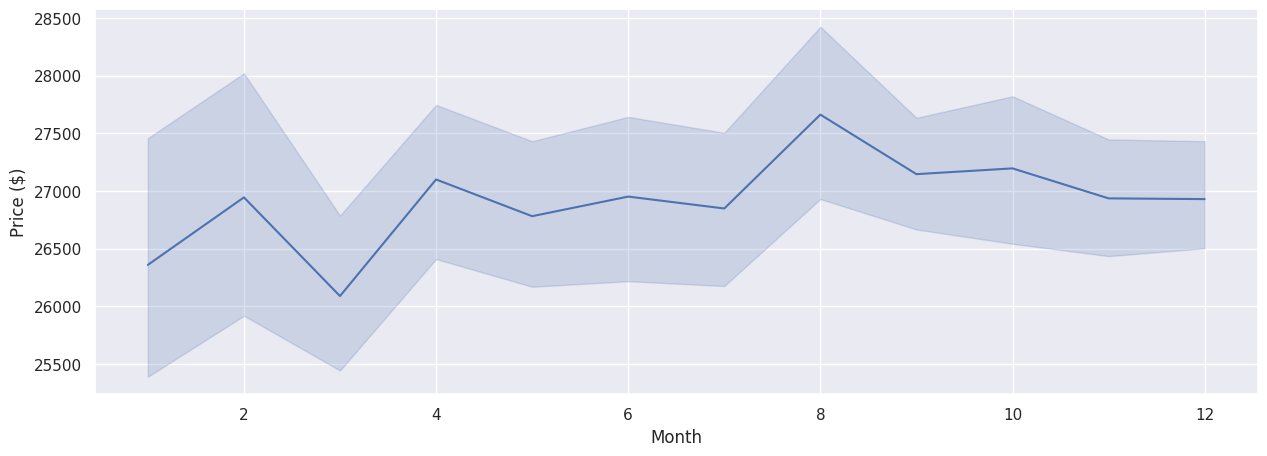

In [83]:
sns.set(rc = {'figure.figsize':(15,5)})
sns.lineplot(data=df, x = 'Month', y = 'Price ($)')

<Axes: xlabel='Year', ylabel='Month'>

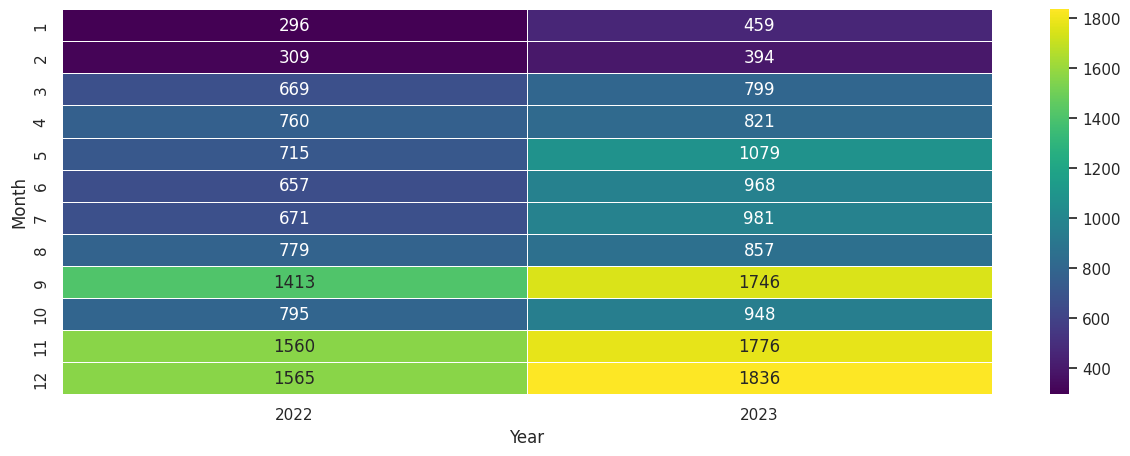

In [84]:
heatmap_data  = df.groupby(["Month", "Year"]).size().reset_index(name = "Count")
flights = (heatmap_data.pivot(index="Month", columns="Year", values="Count"))
#f, ax = mlt.pyplot.subplot(figsize=(9, 6))
sns.heatmap(flights, annot = True, fmt = "d", linewidths=.5, cmap = "viridis")

In [85]:
df['Price/Income'] = df["Price ($)"]/df['Annual Income']

In [86]:
df['Price/Income']

0        1.925926
1        0.012838
2        0.030435
3        1.037037
4        0.016724
           ...   
23901    0.888889
23902    0.017778
23903    0.029787
23904    2.296296
23905    0.022449
Name: Price/Income, Length: 22853, dtype: float32

In [87]:
df.describe()

,Annual Income,Price ($),Month,Year,Price/Income
count,2.285300e+04,22853.000000,22853.000000,22853.00000,22853.000000
mean,8.684160e+05,26956.453125,7.860237,2022.55415,0.325342
std,7.141961e+05,13878.453125,3.259058,0.49707,0.648932
min,1.008000e+04,2200.000000,1.000000,2022.00000,0.001955
25%,4.550000e+05,18000.000000,5.000000,2022.00000,0.019048
50%,7.600000e+05,22001.000000,9.000000,2023.00000,0.033088
75%,1.200000e+06,31001.000000,11.000000,2023.00000,0.074434
max,1.120000e+07,85800.000000,12.000000,2023.00000,2.888963


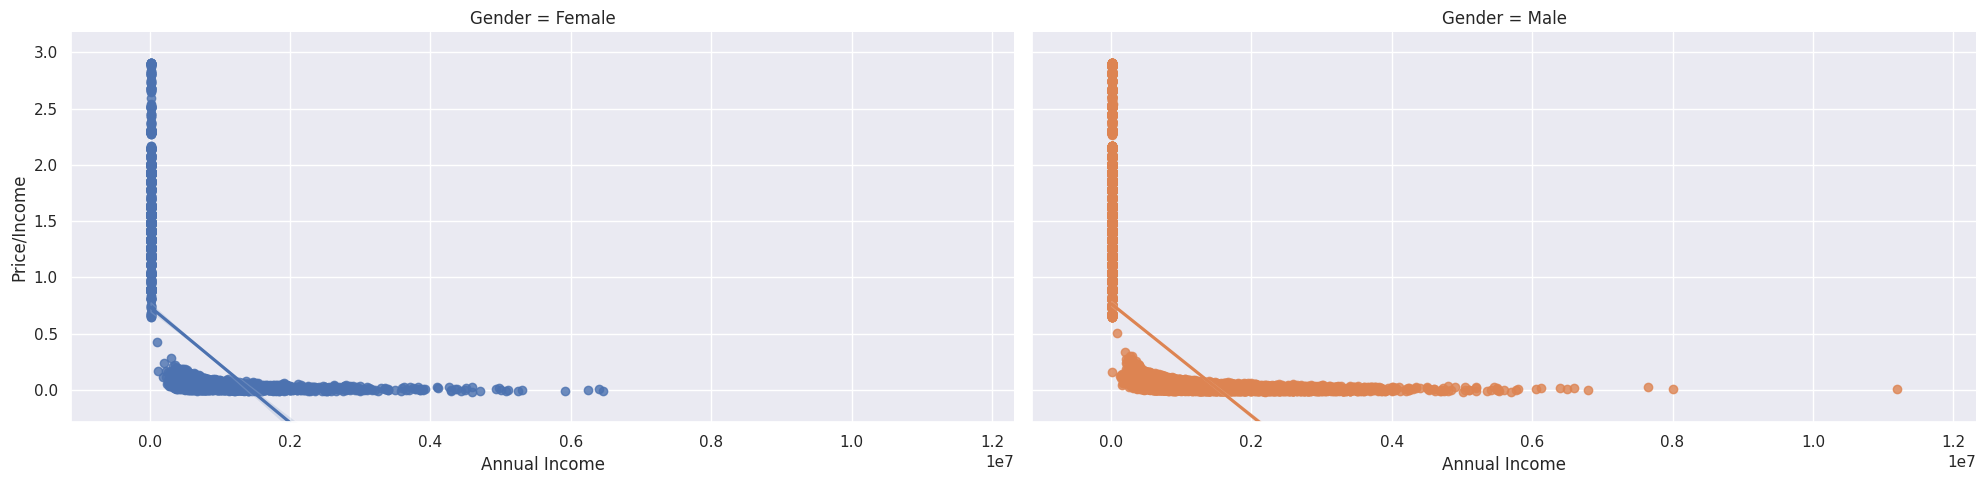

In [88]:
#sns.set(rc = {'figure.figsize':(1,1000)})
Xm = df["Annual Income"].max()
Ym = df["Price/Income"].max()
sns.set_theme(style = "darkgrid")
g = sns.lmplot(
    data = df, x = "Annual Income", y = "Price/Income", col = "Gender", hue = "Gender", aspect= 2, y_jitter=.02
)
for ax in g.axes.flatten():
    ax.set_ylim(0-Ym*0.1, Ym*1.1)
    ax.set_xlim(0-Xm*0.1, Xm*1.1)

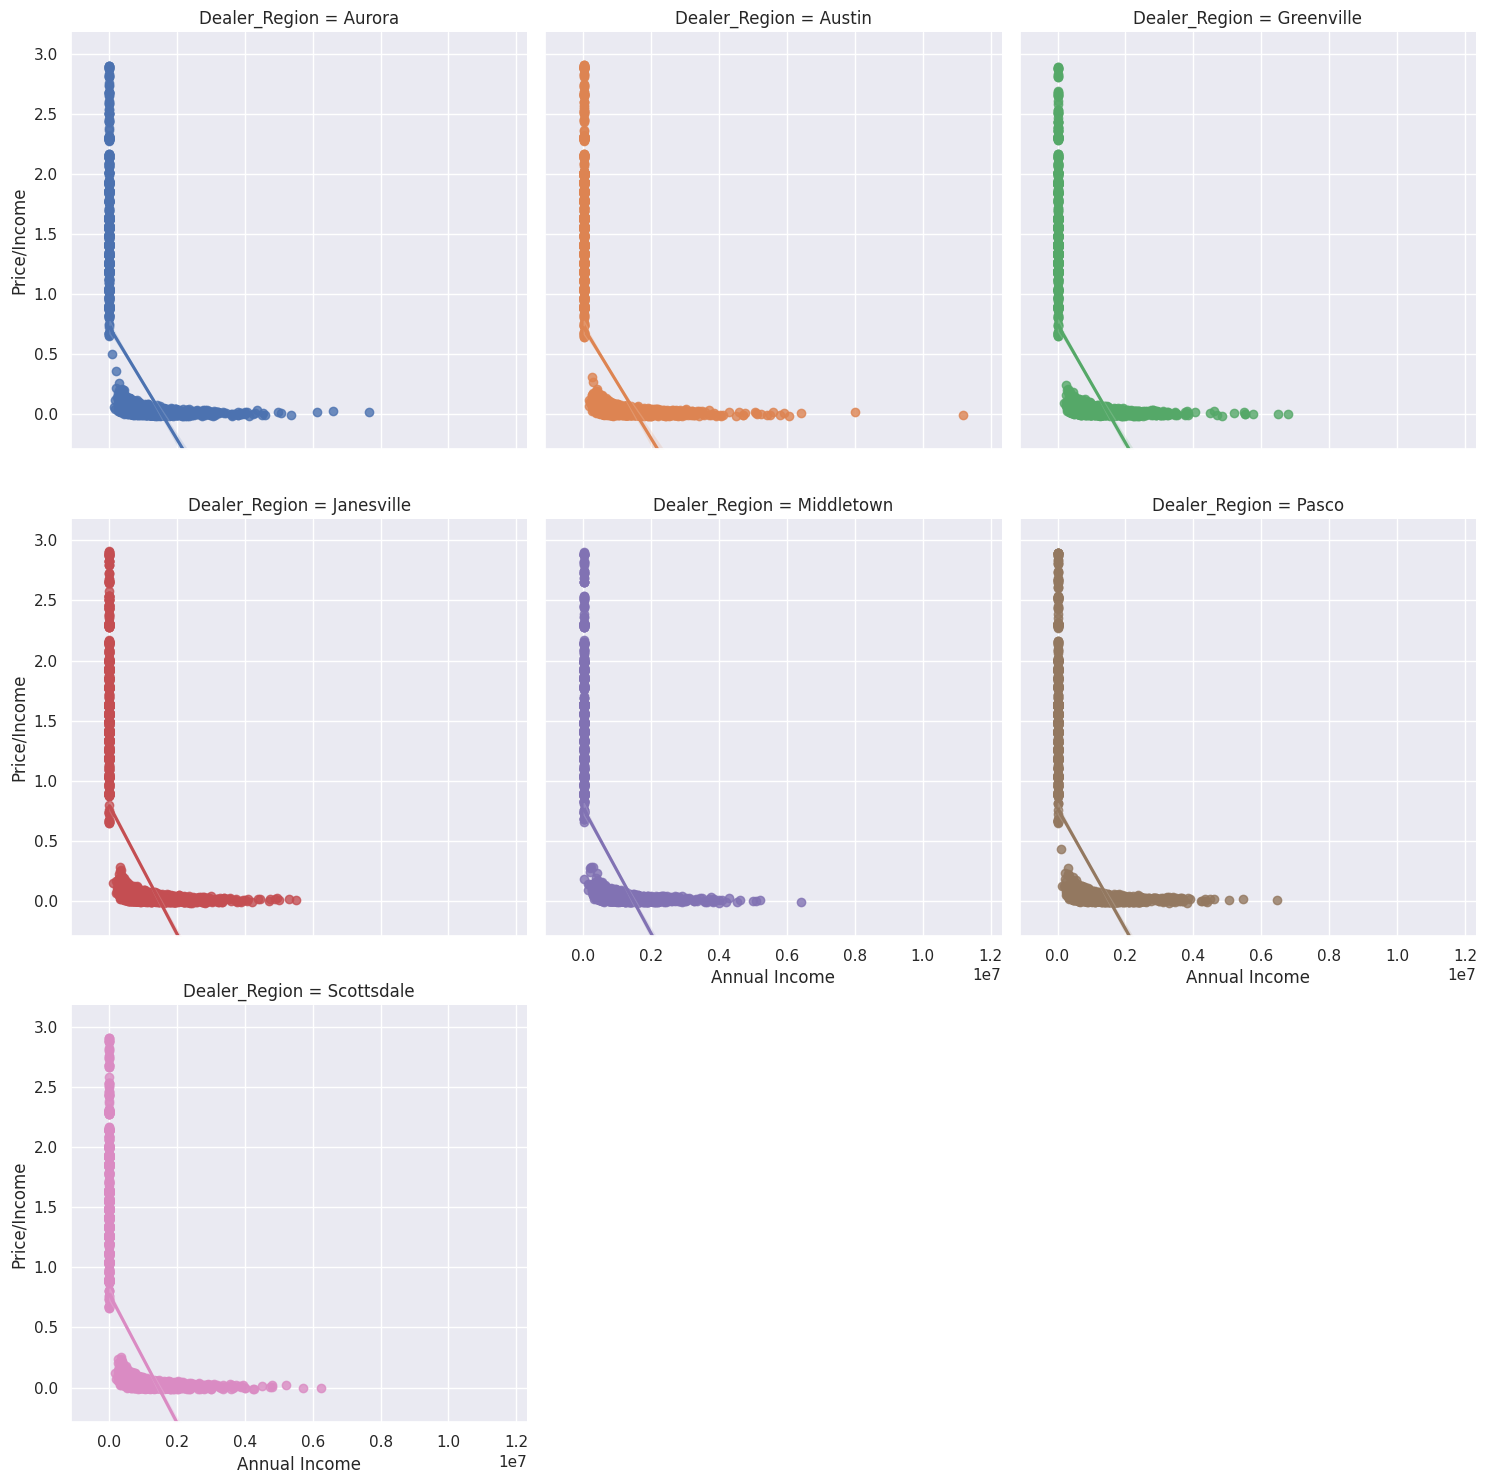

In [89]:
Xm = df["Annual Income"].max()
Ym = df["Price/Income"].max()
sns.set_theme(style = "darkgrid")
g = sns.lmplot(
    data = df, x = "Annual Income", y = "Price/Income", col = "Dealer_Region", hue = "Dealer_Region", aspect= 1, 
    y_jitter=.02, col_wrap=3
    )
for ax in g.axes.flatten():
    ax.set_ylim(0-Ym*0.1, Ym*1.1)
    ax.set_xlim(0-Xm*0.1, Xm*1.1)

<Axes: xlabel='Price ($)', ylabel='Company'>

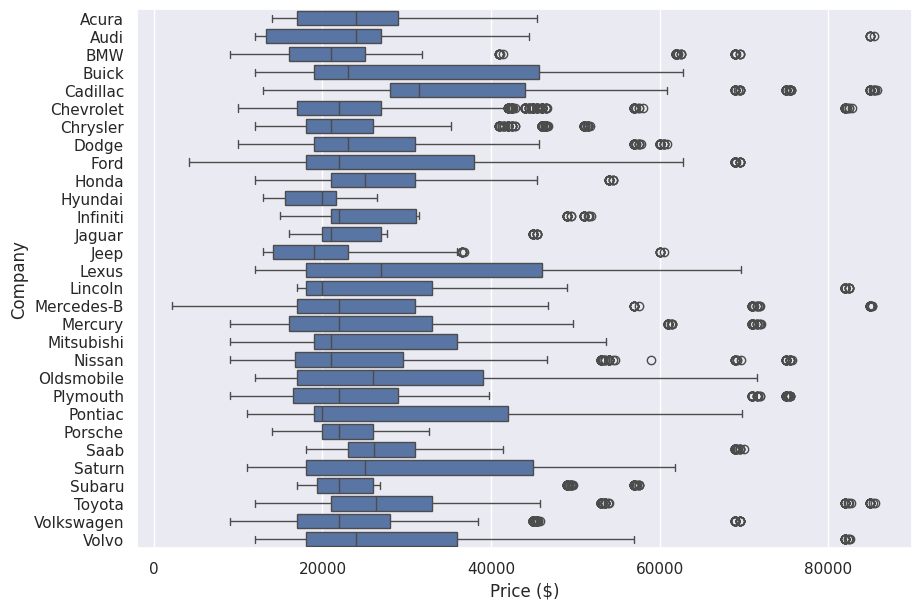

In [90]:
mlt.pyplot.figure(figsize=(10, 7))
sns.boxplot(x = "Price ($)", y = "Company", data = df)

<Axes: xlabel='Price/Income', ylabel='Company'>

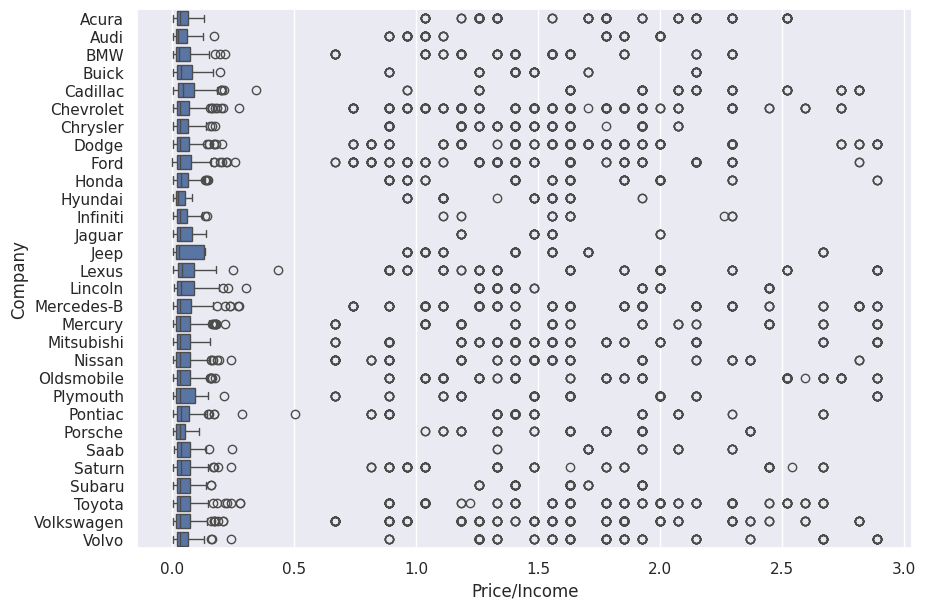

In [91]:
mlt.pyplot.figure(figsize=(10, 7))
sns.boxplot(x = 'Price/Income', y = "Company", data = df)

In [92]:
df_high_class = df.loc[df['Price/Income']<=0.1]
df_middle_class = df.loc[df['Price/Income']<=1.5]
df_middle_class = df.loc[df['Price/Income']>0.1]
df_low_class = df.loc[df['Price/Income']>1.5]

<Axes: xlabel='Price/Income', ylabel='Company'>

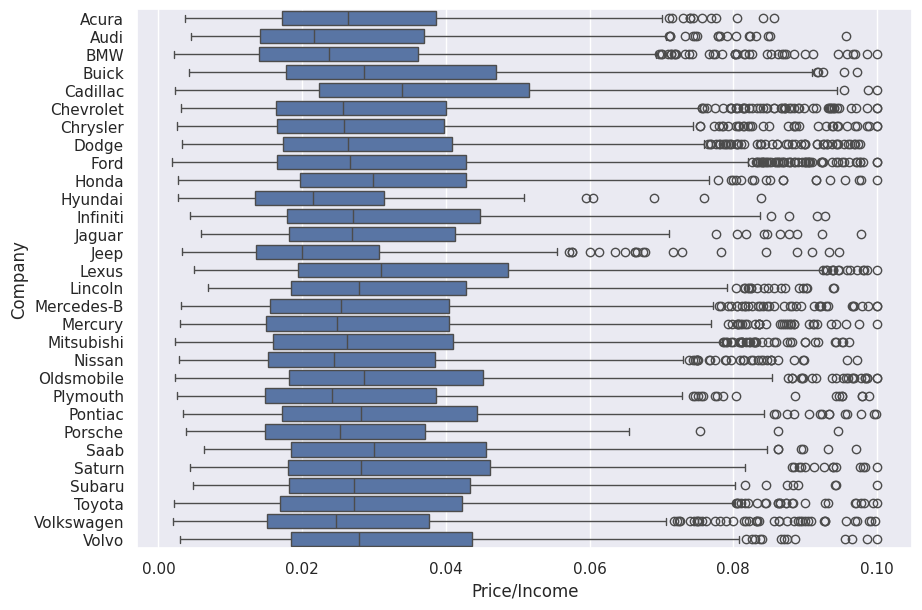

In [93]:
mlt.pyplot.figure(figsize=(10, 7))
sns.boxplot(x = 'Price/Income', y = "Company", data = df_high_class)

<Axes: xlabel='Price/Income', ylabel='Company'>

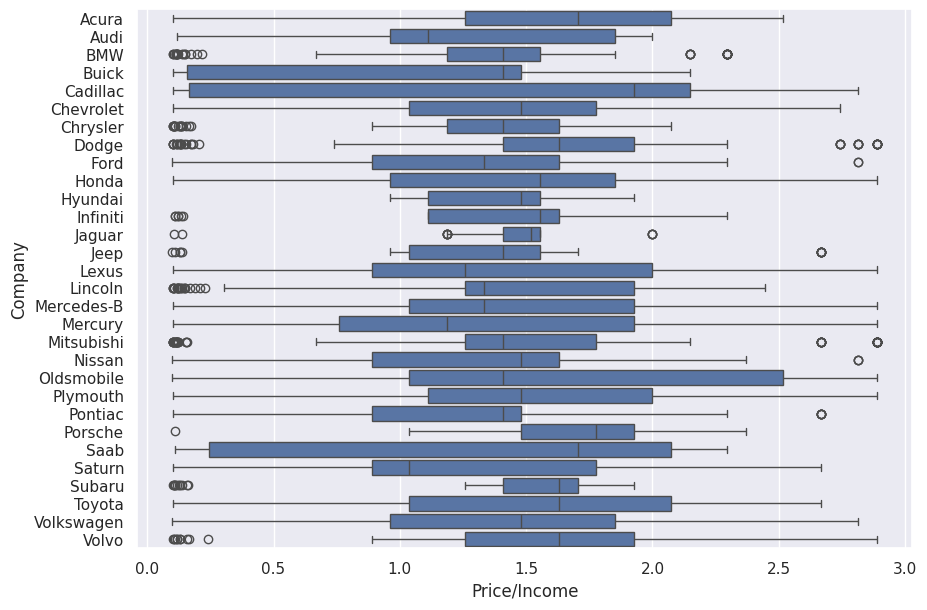

In [94]:
mlt.pyplot.figure(figsize=(10, 7))
sns.boxplot(x = 'Price/Income', y = "Company", data = df_middle_class)

<Axes: xlabel='Price/Income', ylabel='Company'>

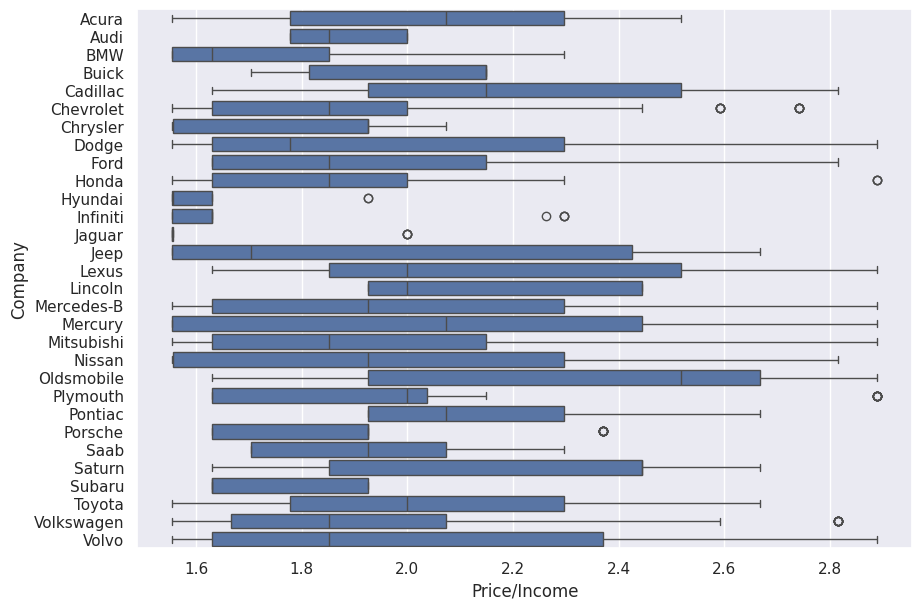

In [95]:
mlt.pyplot.figure(figsize=(10, 7))
sns.boxplot(x = 'Price/Income', y = "Company", data = df_low_class)

<Axes: xlabel='Price ($)', ylabel='Body Style'>

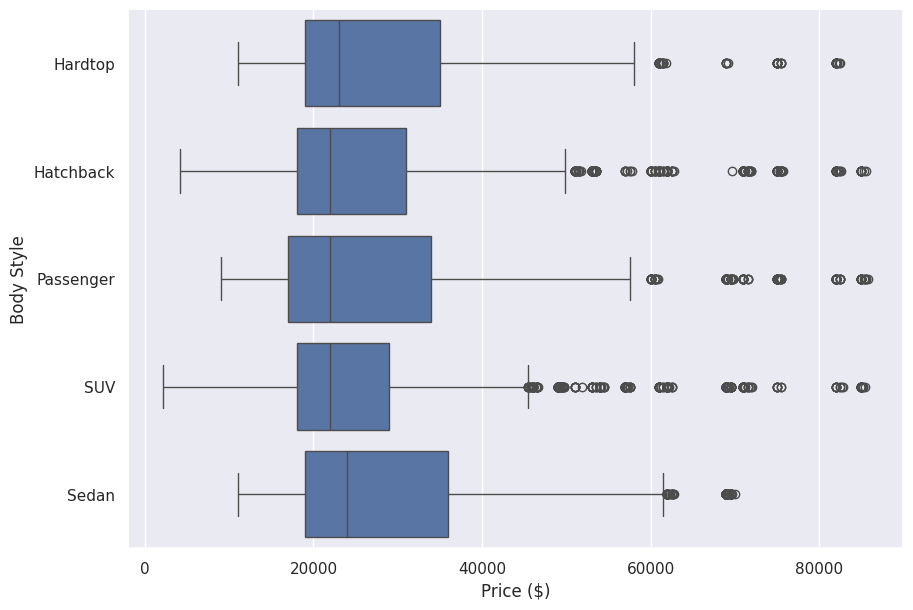

In [96]:
mlt.pyplot.figure(figsize=(10, 7))
sns.boxplot(x = "Price ($)", y = "Body Style", data = df)

<Axes: xlabel='Price ($)', ylabel='Config'>

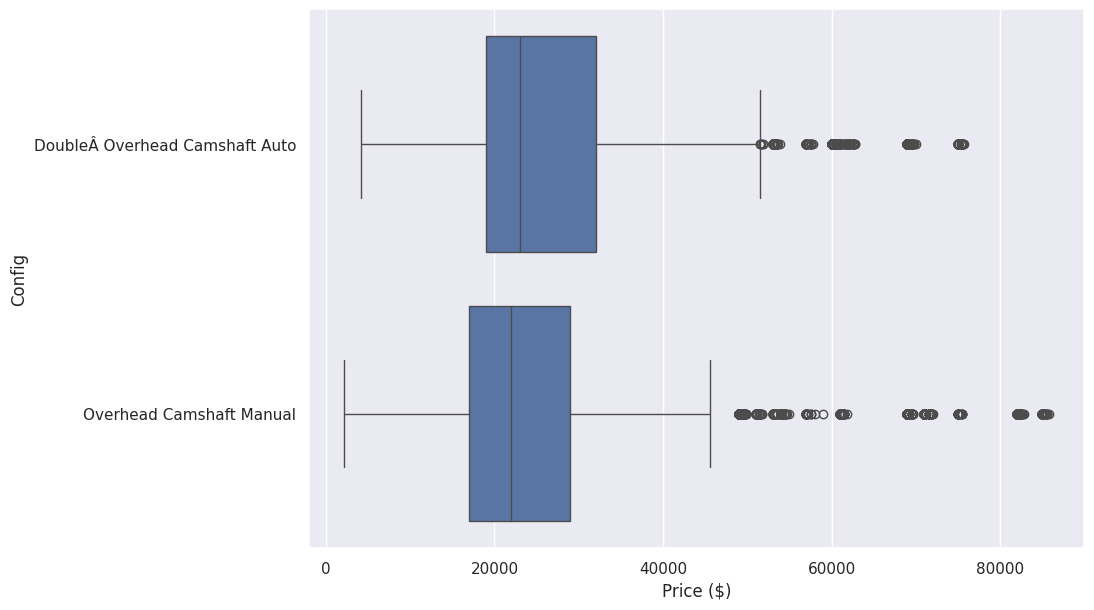

In [97]:
mlt.pyplot.figure(figsize=(10, 7))
sns.boxplot(x = "Price ($)", y = "Config", data = df)

/tmp/ipykernel_114735/600578746.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_10_df = df.groupby("Model").size().reset_index(name = "Count")


<Axes: xlabel='Count', ylabel='Model'>

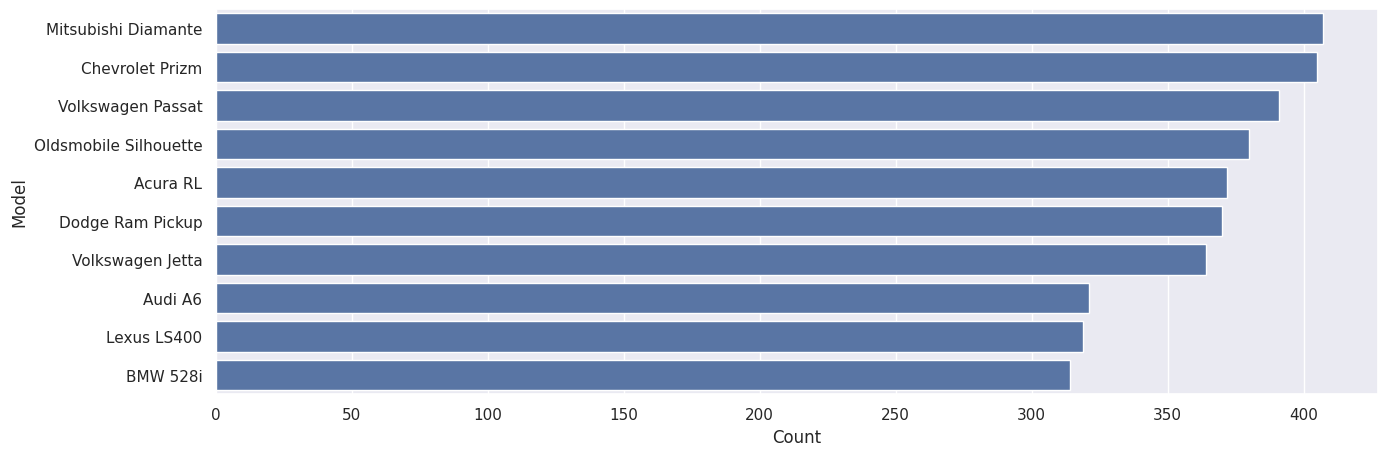

In [98]:
top_10_df = df.groupby("Model").size().reset_index(name = "Count")
top_10_df = top_10_df.sort_values(by = "Count", ascending= False).head(10)
#top_10_df.info(show_counts=True)
top_10_df["Model"]=top_10_df["Model"].cat.remove_unused_categories()
#top_10_df["Model"]
#print(top_10_df['Company'])
sns.barplot(data=top_10_df, x ="Count", y = "Model", order = top_10_df['Model'])

/tmp/ipykernel_114735/3626761235.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_revenue = df.groupby("Company")['Price ($)'].sum().reset_index(name = "Revenue")


<Axes: xlabel='Revenue', ylabel='Company'>

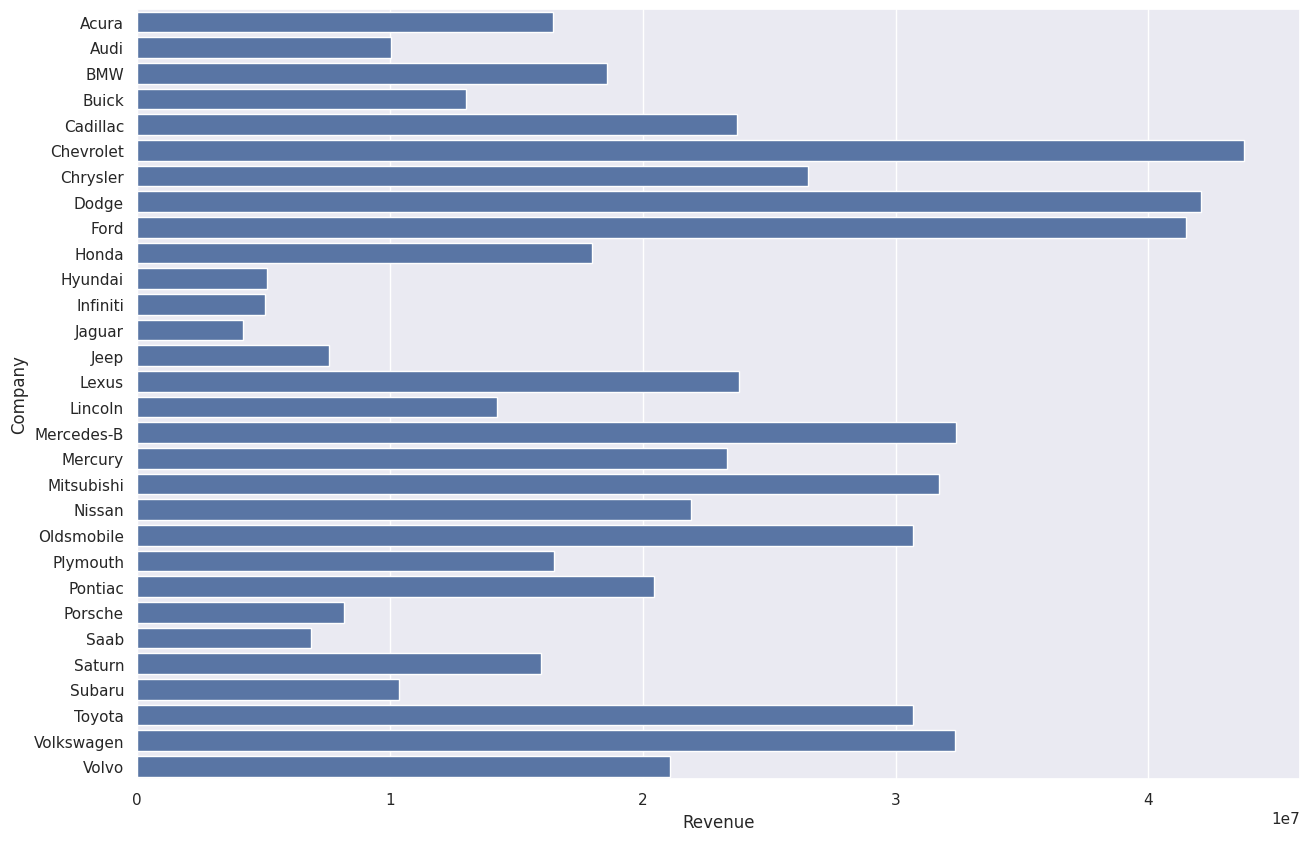

In [112]:
df_revenue = df.groupby("Company")['Price ($)'].sum().reset_index(name = "Revenue")
mlt.pyplot.figure(figsize = (15,10))
sns.barplot(data=df_revenue, x ="Revenue", y = "Company")

/tmp/ipykernel_114735/2018586881.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_revenue = df.groupby(["Company", "Year"])['Price ($)'].sum().reset_index(name = "Revenue")


<Axes: xlabel='Revenue', ylabel='Company'>

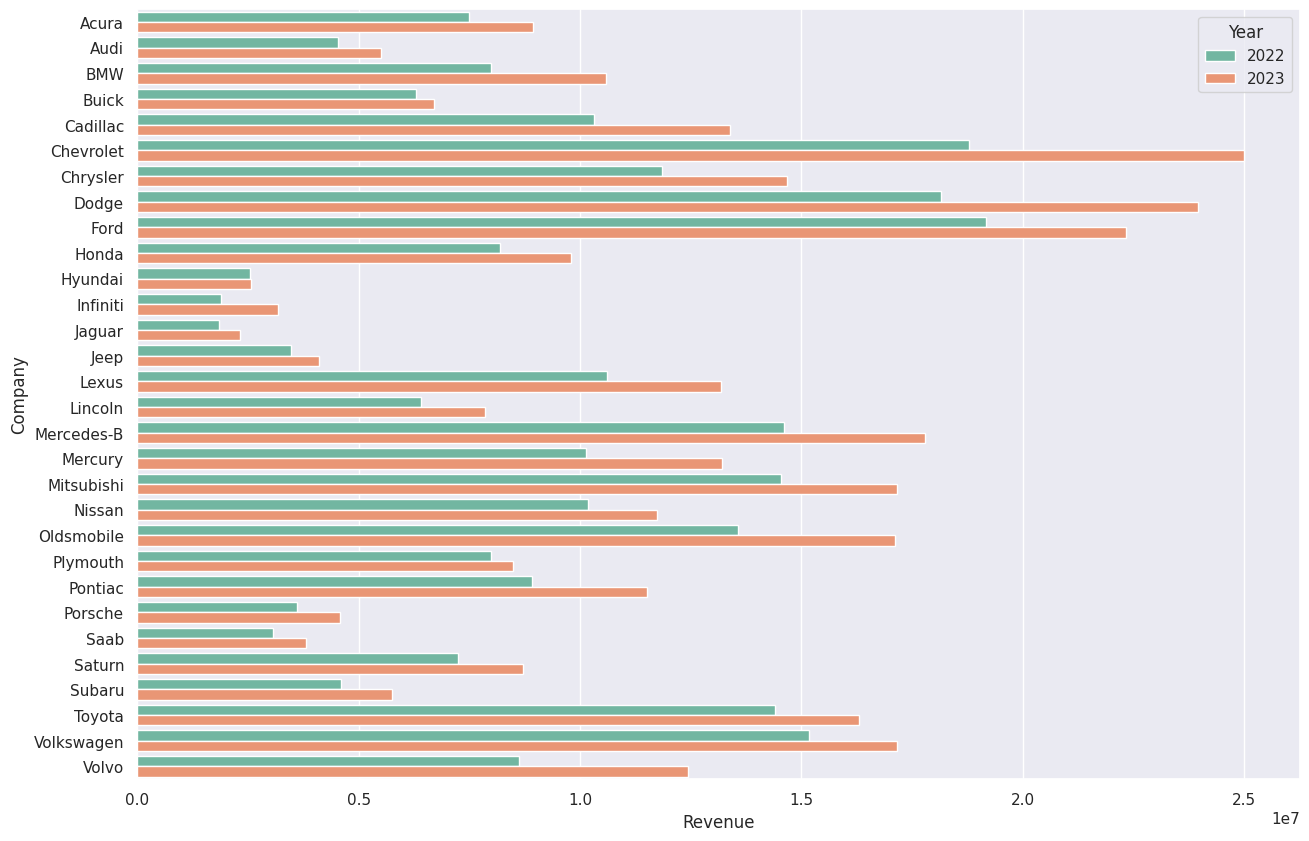

In [114]:
df_revenue = df.groupby(["Company", "Year"])['Price ($)'].sum().reset_index(name = "Revenue")
mlt.pyplot.figure(figsize = (15,10))
sns.barplot(data=df_revenue, x ="Revenue", y = "Company", hue="Year", palette='Set2')

/tmp/ipykernel_114735/2252852097.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_revenue = df.groupby(["Company", "Year"])['Price ($)'].mean().reset_index(name = "Revenue")


<Axes: xlabel='Revenue', ylabel='Company'>

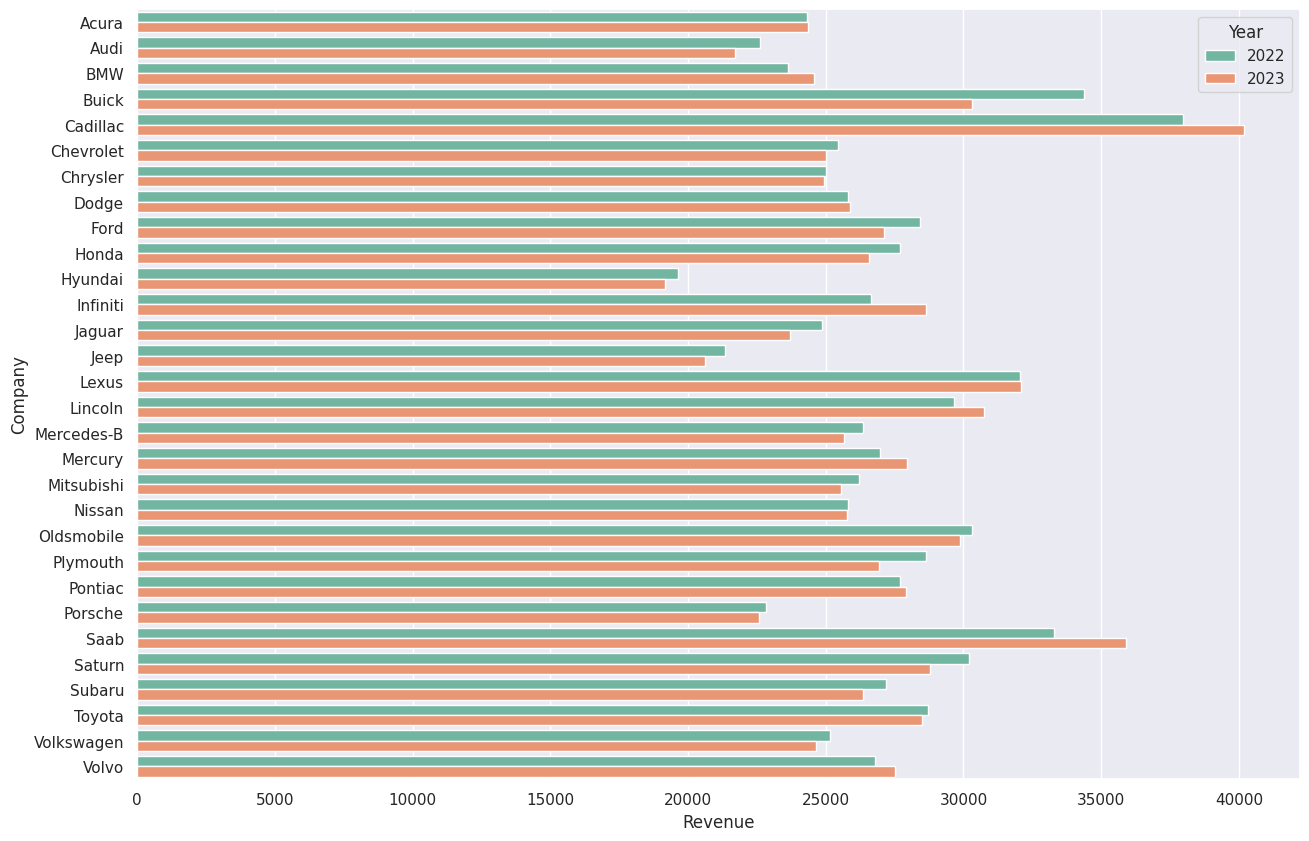

In [115]:
df_revenue = df.groupby(["Company", "Year"])['Price ($)'].mean().reset_index(name = "Revenue")
mlt.pyplot.figure(figsize = (15,10))
sns.barplot(data=df_revenue, x ="Revenue", y = "Company", hue="Year", palette='Set2')

/tmp/ipykernel_114735/1736165068.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_revenue = df.groupby(["Company", "Year"])['Price ($)'].count().reset_index(name = "Count")


<Axes: xlabel='Count', ylabel='Company'>

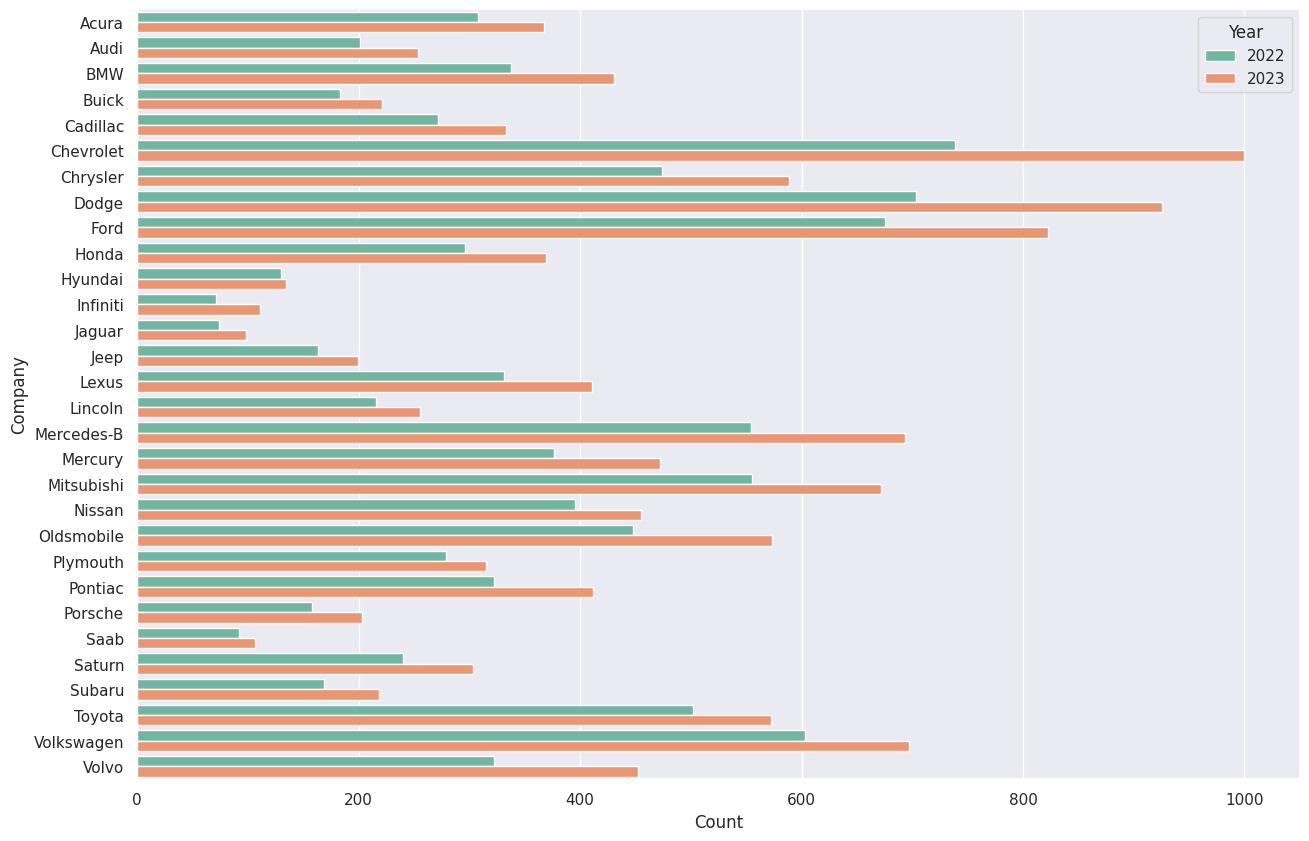

In [116]:
df_revenue = df.groupby(["Company", "Year"])['Price ($)'].count().reset_index(name = "Count")
mlt.pyplot.figure(figsize = (15,10))
sns.barplot(data=df_revenue, x ="Count", y = "Company", hue="Year", palette='Set2')